In [2]:
from gillespie.gillespie_dynamic import gillespie_dynamic
import matplotlib.pyplot as plt

In [5]:
# Lotka-Volterra system
# Parameters from:
# Daniel T. Gillespie. Exact stochastic simulation of coupled chemical reactions. 
# J. Phys. Chem. 1977, 81, 25, 2340–2361. December 1, 1977

# reagent Y1 : prey, Y2 : predator, X : food for prey
reag_quant = [1e3, 1e3, 1e5]

# Reaction
# Y1 + X -> rate c1 -> 2 Y1
# Y1 + Y2 -> rate c2 -> 2 Y2
# Y2 -> rate c3 -> Z
# Y1 -> rate c4 -> Z  #optional
state_change_vect = {'standard':[[+1, 0, -1],
                                 [-1, +1, 0],
                                 [0, -1, 0],
                                 [-1, 0, 0]]}
# # fig 8
# c1 = 0.0002
# c2 = 0.01
# c3 = 10

# fig 12, 13
c1 = 0.0002
c2 = 0.01
c3 = 10
c4 = 10

combinatorics = {'standard':[lambda a,b,x : (a * x * c1),
                             lambda a,b,x : (a * b * c2),
                             lambda a,b,x : (b * c3),
                             lambda a,b,x : (a * c4)]
                }

In [6]:
lotka = gillespie_dynamic(reagent_quantity=reag_quant,
                  state_change_vectors=state_change_vect,
                  combinatorics=combinatorics,
                  stop_condition='iterations', 
                  max_iteration=1e6,
                  start_with='standard',
                  set_fixed_reagents=[2])

Actual state is: standard, actual iteration is: 0, simulation time is 0, real time is: Sun Nov  3 22:14:09 2024.


In [7]:
lotka.actual_iteration

1000000

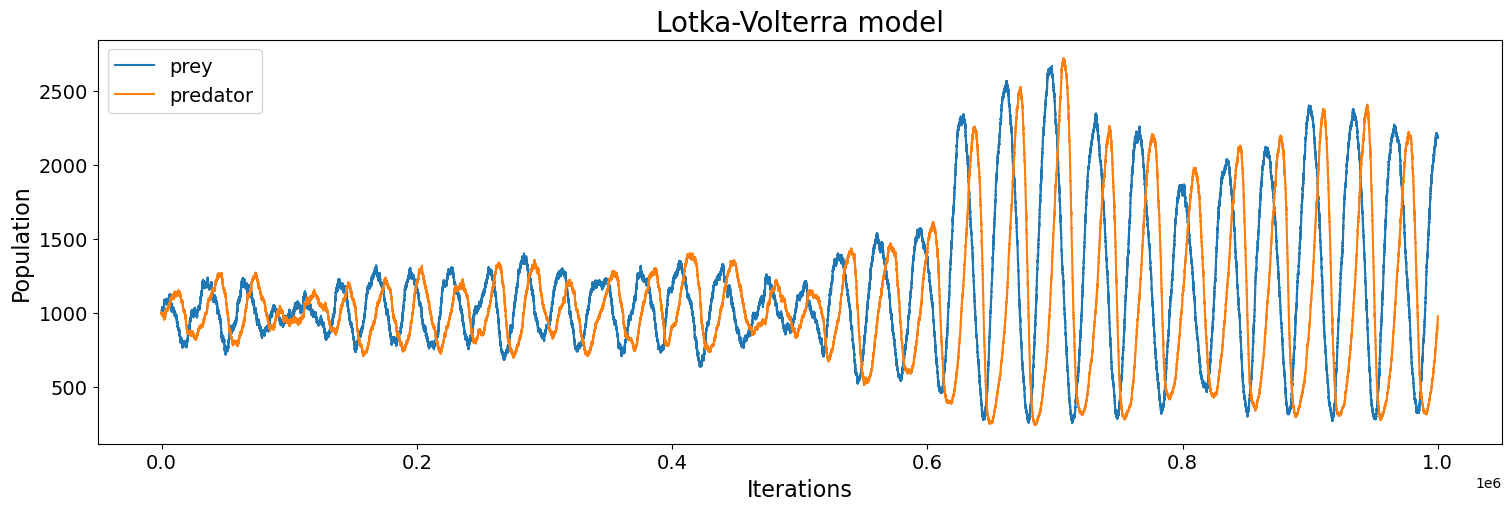

In [23]:
fig = plt.figure(figsize=(15,5), layout='constrained')
plt.plot([i for i in range(lotka.actual_iteration+1)],[y[0] for y in lotka.molecular_species_history])
plt.plot([i for i in range(lotka.actual_iteration+1)],[y[1] for y in lotka.molecular_species_history])
# plt.plot(lotka.timestep_list,[y[2] for y in lotka.molecular_species_history])
plt.legend(['prey', 'predator', 'food'], fontsize=14)
plt.title('Lotka-Volterra model', fontsize=20)
plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Population', fontsize=16)
plt.yticks(fontsize=14);

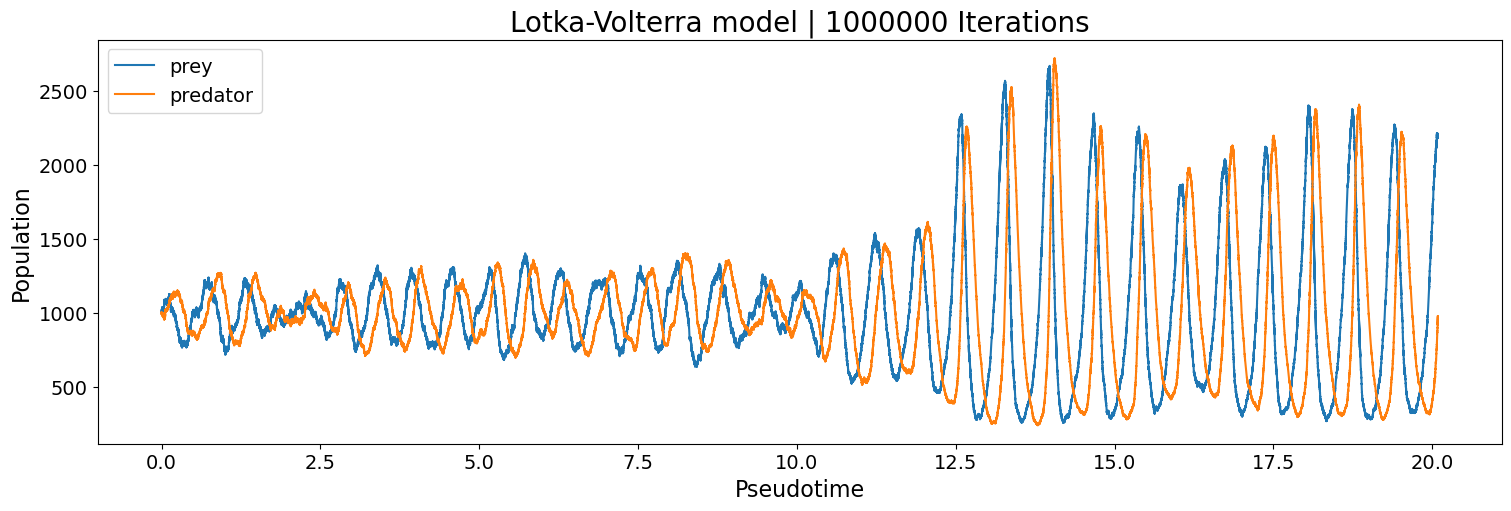

In [24]:
fig = plt.figure(figsize=(15,5), layout='constrained')
plt.plot(lotka.timestep_list,[y[0] for y in lotka.molecular_species_history])
plt.plot(lotka.timestep_list,[y[1] for y in lotka.molecular_species_history])
# plt.plot(lotka.timestep_list,[y[2] for y in lotka.molecular_species_history])
plt.legend(['prey', 'predator', 'food'], fontsize=14)
plt.title(f'Lotka-Volterra model | {lotka.actual_iteration} Iterations', fontsize=20)
plt.xlabel('Pseudotime', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Population', fontsize=16)
plt.yticks(fontsize=14);


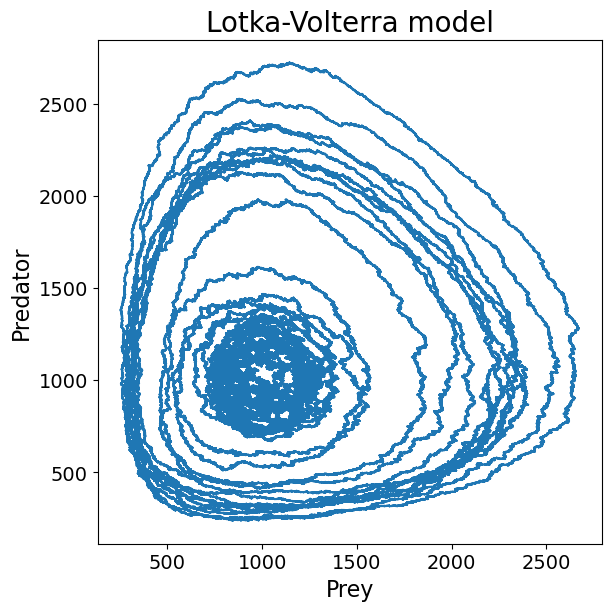

In [30]:
fig = plt.figure(figsize=(6,6), layout='constrained')
plt.plot([y[0] for y in lotka.molecular_species_history], [y[1] for y in lotka.molecular_species_history],)
# plt.title('Lotka-Volterra model', fontsize=20)
plt.title('Lotka-Volterra model', fontsize=20)
plt.xlabel('Prey', fontsize=16)
plt.ylabel('Predator', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

